In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io, color

KeyboardInterrupt: 

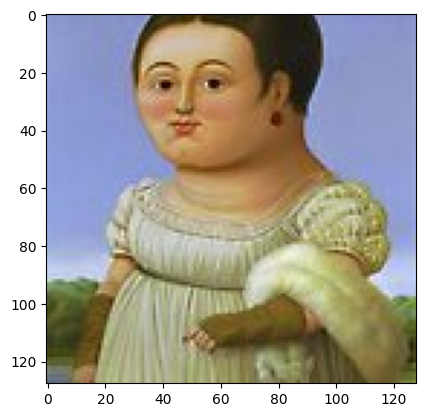

In [ ]:
img = cv2.cvtColor(cv2.imread("../data/MissRiviere.jpg"), cv2.COLOR_BGR2RGB)
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(img)
plt.show()

img = color.rgb2lab(img)

In [ ]:
def objective_function(vec,out, img):
    # blank mask for drawing the shapes
    shapes = np.zeros_like(img)
    t = np.copy(out)
    # draw circle
    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (vec[3], vec[4], vec[5]), cv2.FILLED)
    mask = shapes.astype(bool)
    t[mask] = cv2.addWeighted(t, 1-vec[6], shapes, vec[6], 0)[mask]

    # plt.imshow(t)
    # plt.show()

    #bt = t[: ,: ,0]
    #gt = t[: ,: ,1]
    #rt = t[: ,: ,2]
    #bImg = img[:,:,0]
    #gImg = img[:,:,1]
    #rImg= img[:,:,2]
    # print("(",vec[3],vec[4],vec[5],")")
    #t = color.rgb2lab(t)
    #return np.sum(color.deltaE_cie76(t, img))
    return np.sum(np.abs(np.subtract(img,t))) 

    #b  = f1_score(bImg, bt, average='micro')
    #g =  f1_score(gImg, gt, average='micro')
    #r =  f1_score(rImg, rt, average='micro')
    #return np.average((r, g, b)) 
    
out = np.zeros_like(img)
objective_function([100,90, 8, 0,0,255,0.3], out, img) #X,Y,r,R,G,B,alpha

1925384.0316979864

In [ ]:
def draw_circle(vec, out, print = False):
    shapes = np.zeros_like(out)

    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (vec[3], vec[4], vec[5]), cv2.FILLED)
    mask = shapes.astype(bool)
    out[mask] = cv2.addWeighted(out, 1-vec[6], shapes, vec[6], 0)[mask]

    if print:
        plt.imshow(out)
        plt.show()

In [ ]:
w,h,c = img.shape

bounds = [
    [0,w],# x
    [0,h], # y
    [5, (w + h)//4], # radius
    [0,255], # R
    [0,255], # G
    [0,255], # B
    [0.3,1], # alpha
]

nIter = 50

# Our Differential Evolution

In [ ]:
from differential_evolution import differential_evolution

0 {'P': array([ 5.08882068, 67.26145231,  5.        ,  0.        ,  1.93039943,
        2.83370514,  0.30155348]), 'nIt': 800, 'fun': 1072860.7644572754, 'nFev': 24030}


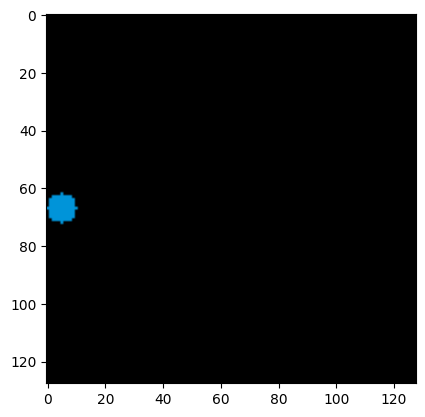

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


10 {'P': array([ 0.        ,  0.        , 33.91461423,  1.76497831,  1.96295029,
        2.19144366,  0.3       ]), 'nIt': 800, 'fun': 299110.41990991123, 'nFev': 24030}


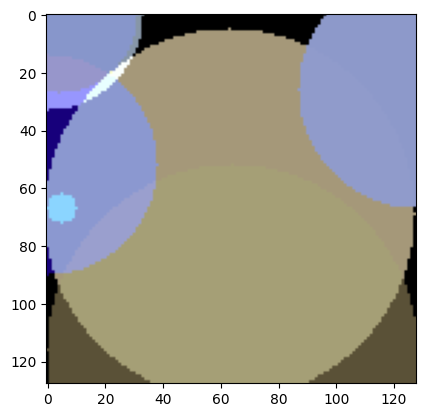

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


20 {'P': array([ 0.        ,  0.        , 12.68007109,  0.        ,  0.        ,
        0.        ,  1.        ]), 'nIt': 800, 'fun': 251812.19520543978, 'nFev': 24030}


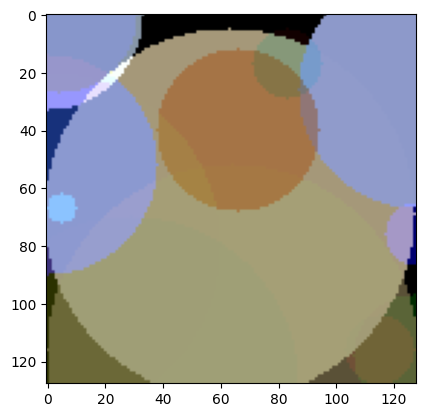

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


30 {'P': array([ 3.54518833,  0.27029433, 58.70367287,  0.        ,  0.58414066,
        0.        ,  0.3       ]), 'nIt': 800, 'fun': 237049.74275965017, 'nFev': 24030}


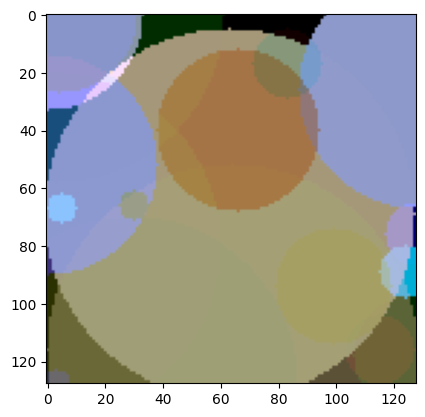

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


40 {'P': array([0. , 0. , 5. , 0. , 0. , 0. , 0.3]), 'nIt': 800, 'fun': 231790.76652530732, 'nFev': 24030}


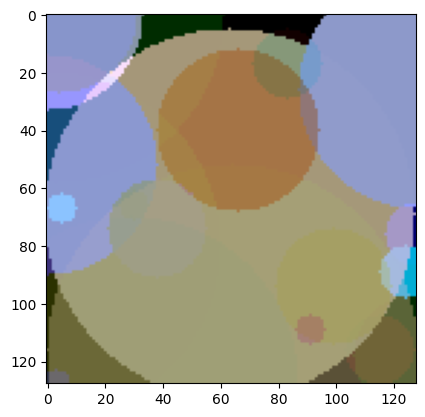

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


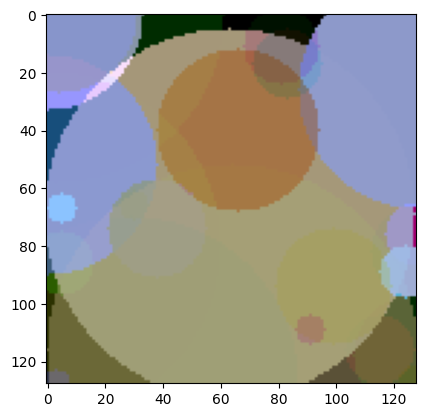

In [ ]:
out = np.zeros_like(img)
for i in range(nIter):
    r = differential_evolution(objective_function, bounds, args = (out, img), popSize=30, cR = 0.4, nGen = 800) #The smaller cR is, it takes less risks
    if i % (nIter // np.min((nIter, 5))): 
        draw_circle(r["P"], out)
    else:
        print(i, r)
        draw_circle(r["P"], out, True)
plt.imshow(out)

# Scipy Differential Evolution

In [ ]:
from scipy.optimize import differential_evolution

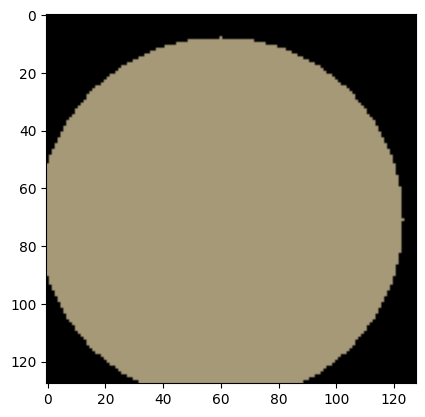

0      fun: 579881.4117153322
     jac: array([ 0.        ,  0.        ,  0.        ,  8.37026169, -8.33533709,
       -1.28056855, -1.76951289])
 message: 'Optimization terminated successfully.'
    nfev: 9611
     nit: 90
 success: True
       x: array([60.90190787, 71.48648519, 63.75382674,  2.08945027,  1.93071604,
        1.52322485,  0.31109414])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


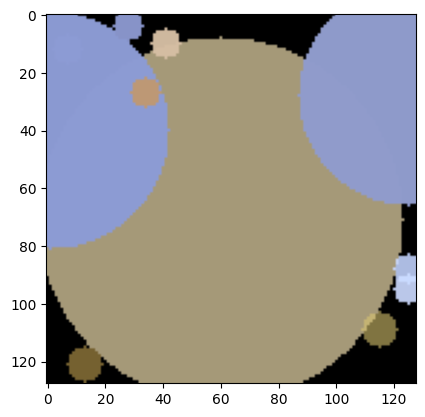

10      fun: 321174.3388660082
     jac: array([ 0.        ,  0.        ,  0.        , -0.01164153,  0.01164153,
        0.        , -0.01164153])
 message: 'Optimization terminated successfully.'
    nfev: 5014
     nit: 45
 success: True
       x: array([34.22854512, 27.16368452,  5.74219921,  0.8505832 ,  0.59349537,
        0.25413854,  0.639818  ])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


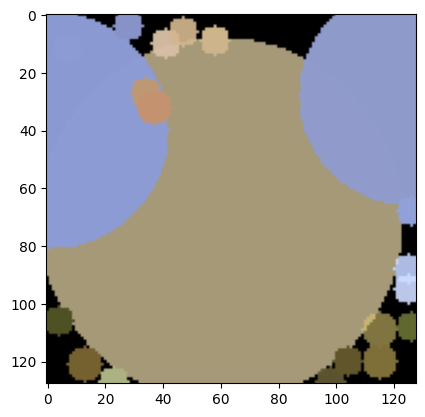

20      fun: 290520.7890265685
     jac: array([ 0.        ,  0.        ,  0.        ,  0.17462298,  0.02328306,
        0.04656613, -2.94530763])
 message: 'Optimization terminated successfully.'
    nfev: 6604
     nit: 59
 success: True
       x: array([  4.63270888, 106.22049407,   5.13602719,   0.3033862 ,
         0.31812717,   0.1419698 ,   1.        ])


In [ ]:
out = np.zeros_like(img)
for i in range(nIter):
    res = differential_evolution(objective_function, bounds, args=(out,img))
    # plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
    # plt.show()
    if i % (nIter // np.min((nIter, 5))): draw_circle(res.x, out)
    else:
        draw_circle(res.x, out, True)
        print(i, res)
plt.imshow(out)

# Project

## Recommendation

Work along *scipy*. The idea is to make the project behave as scipy does.

Start with something small and easy. With few details and an image of 200 x 200 approx.

## Individual

The individual is recommended to have:

- **x** - x coordinate value of the circle.

- **y** - y coordinate value of the circle.

- **r** - Radius of the circle, recommended value is (3 or something like that to half the image size).

- **Colors** - RGBA

    - Alpha is optional.

## How it works

This algorithm has to execute itself as many times as circles the image has.

Each execution will add a new circle that minimizes the difference between the image we're building and the target one.